## 1. Data exploration

The data is based on:

- __4264__ observations
- __5__ features 
- __12__ distinct users

Features:

 - __user__: user id
 - __rate_blink_left__: percentage the user blinked left eye (0.0 until 1.0)
 - __rate_blink_right__: percentage the user blinked right eye (0.0 a 1.0)
 - __rate_smile_or_not__: percentage the user smile (0.0 a 1.0)
 
Target:

 - __feel__: emotion (0-sad | 1-angry | 2-happy)

### Get started

In [1]:
# Include the predict server path to access data and scripts
import os,sys
parentdir = os.path.dirname("../server/")
sys.path.append(parentdir)

# Imports to execute the analisys
from data import get_full_data, get_training, get_predict
from matplotlib import pyplot as plt
from sklearn import linear_model
from predicting import accuracy_score, performance_metric, real_world, plot_learning_curve
import pandas as pd
import numpy as np

# Allows the use of display() for DataFrames
from IPython.display import display 

# Import supplementary visualizations code visuals.py
import visuals as vs

# Get X (Features) and Y (Target)
# features (rate_blink_left, rate_blink_right, rate_smile_or_not)
# target (0 - sad, 1 - angry, 2 - happy)
X, Y, df = get_full_data()

# Print the first few entries
display(X.head(25))

,rate_blink_left,rate_blink_right,rate_smile_or_not
0,0.99,0.51,0.01
1,0.99,0.79,0.01
2,0.99,0.79,0.01
3,0.99,0.79,0.01
4,0.99,0.79,0.01
5,0.99,0.79,0.01
6,0.99,0.79,0.01
7,0.81,0.76,0.01
8,0.81,0.76,0.01
9,0.81,0.76,0.01


## Investigate data exploration

We will to compute the following:

- The total number of expressions, n_expressions.
- The total number of features for each expression, n_features.

In [2]:
# Calculate number of features
n_features = len(df.columns) - 1 # 1 minus target label 

# Selecting sad expressions
df_sad = df[df['feel'] == 0]
# Selecting angry expressions
df_angry = df[df['feel'] == 1]
# Selecting happy expressions
df_happy = df[df['feel'] == 2]

# Calculate number of expressions
n_expressions = len(df.index)
n_sad_expressions = len(df_sad)
n_angry_expressions = len(df_angry)
n_happy_expressions = len(df_happy)

# Print the results
print "Number of features: {}".format(n_features)
print "Total number of sad expressions: {}".format(n_sad_expressions)
print "Total number of angry expressions: {}".format(n_angry_expressions)
print "Total number of happy expressions: {}".format(n_happy_expressions)
print "Total number of expressions: {}".format(n_expressions)

Number of features: 4
Total number of sad expressions: 1382
Total number of angry expressions: 1441
Total number of happy expressions: 1441
Total number of expressions: 4264


### Create a function to analysing

We will see the ocorrency of 3 features

In [3]:
# Representation examples
# Good references about data analisys
#http://felipegalvao.com.br/blog/2016/03/08/visualizacao-de-dados-com-python-matplotlib/
# Another links
# http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-classifier-in-an-svm-supervised-learning-model/
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py
#http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
def display_features(X, Y):
    from collections import Counter
    
    fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    
    # Dados do grafico de piscadas do olho esquerdo aberto
    y_axis = X['rate_blink_left'].copy()
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'orange'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[0].set_xlabel('Probabilidade (rate_blink_left)')
    eixos[0].set_ylabel('Ocorrencia')
    eixos[0].hist(y_axis, bins=15, color=bar_color)
    eixos[0].set_title('Probabilidade do olho esquerdo aberto')
    
    # Dados do grafico de piscadas do olho direito aberto
    y_axis = X['rate_blink_right'].copy()
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'red'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[1].set_xlabel('Probabilidade (rate_blink_right)')
    eixos[1].set_ylabel('Ocorrencia')
    eixos[1].hist(y_axis, bins=15, color=bar_color)
    eixos[1].set_title('Probabilidade do olho direito aberto')
    
    # Dados do grafico de estar sorrindo
    y_axis = X['rate_smile_or_not'].copy()
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'blue'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[2].set_xlabel('Probabilidade (rate_smile_or_not)')
    eixos[2].set_ylabel('Ocorrencia')
    eixos[2].hist(y_axis, bins=15, color=bar_color)
    eixos[2].set_title('Probabilidade de sorriso')
    
    # Ajusta o espaço entre os dois gráficos
    plt.subplots_adjust(wspace=.5)
    plt.show()

###  Feature Observation

We are see the 3 features in dataset

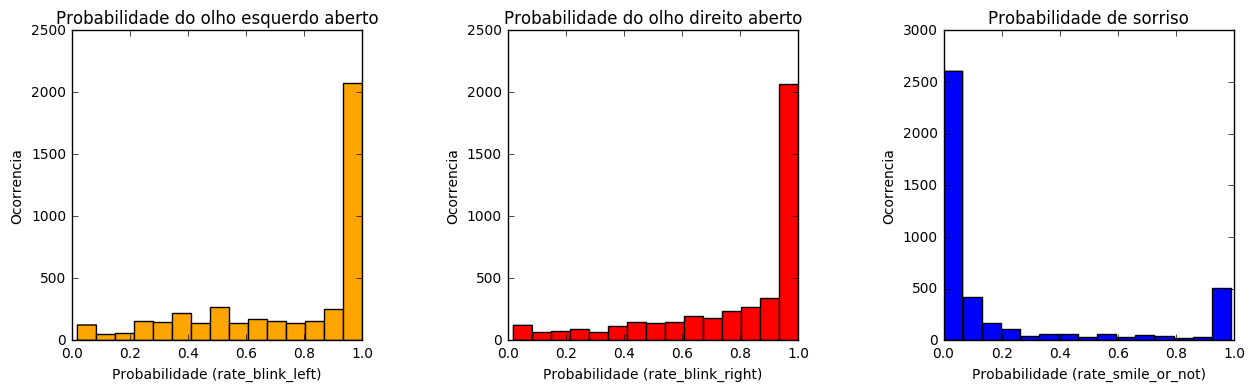

In [4]:
display_features(X, Y)

### Expression distribution 

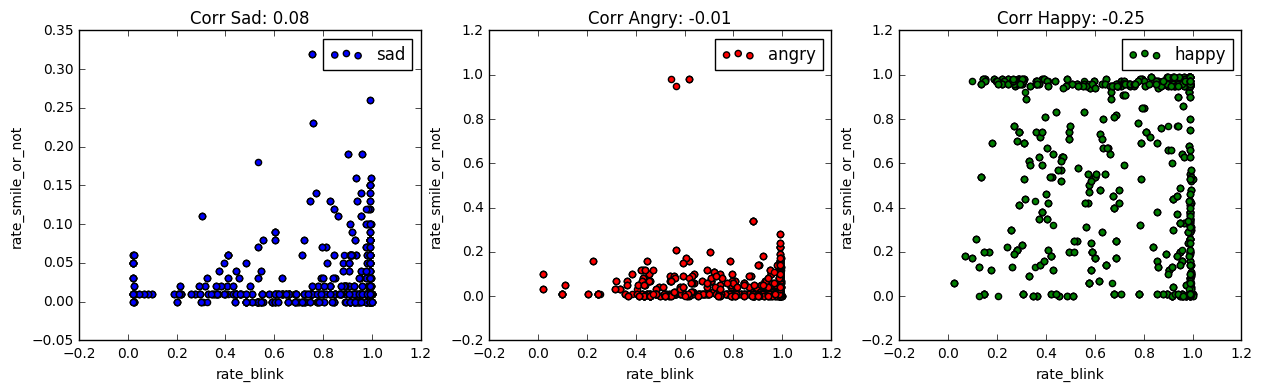

In [192]:
df_sad.loc[:, 'rate_blink'] = df_sad.apply(lambda x: (x['rate_blink_left'] + x['rate_blink_right'] ) / 2, axis=1)
df_angry.loc[:, 'rate_blink'] = df_angry.apply(lambda x : (x['rate_blink_left'] + x['rate_blink_right'] ) / 2, axis=1)
df_happy.loc[:, 'rate_blink'] = df_happy.apply(lambda x : (x['rate_blink_left'] + x['rate_blink_right'] ) / 2, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

cor_sad = df_sad[['rate_blink', 'rate_smile_or_not']].corr(method='pearson').values[0][1]
cor_angry = df_angry[['rate_blink', 'rate_smile_or_not']].corr(method='pearson').values[0][1]
cor_happy = df_happy[['rate_blink', 'rate_smile_or_not']].corr(method='pearson').values[0][1]

axes = df_sad.plot.scatter(x='rate_blink', y='rate_smile_or_not', color='b', label='sad', ax=ax[0])
axes.set_title("Corr Sad: {:.2f}".format(cor_sad))
axes = df_angry.plot.scatter(x='rate_blink', y='rate_smile_or_not', color='r', label='angry', ax=ax[1])
axes.set_title("Corr Angry: {:.2f}".format(cor_angry))
axes = df_happy.plot.scatter(x='rate_blink', y='rate_smile_or_not', color='g', label='happy', ax=ax[2])
axes.set_title("Corr Happy: {:.2f}".format(cor_happy))

# 2. Data preprocessing

We will smoothing and transform data to trying detect outliers and improve the final model

### Soothing transformation and outliers

In [310]:
def corr_and_normalize(name, df, normalization, color):
    X_normalized, Y_normalized = normalization(df)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    
    axes = pd.DataFrame.from_items([
        ('rate_smile_or_not', Y_normalized.ravel()), 
        ('rate_blink' , X_normalized.ravel())
    ]).plot.scatter(x='rate_blink', y='rate_smile_or_not', color=color, ax=ax[0])
    # Set plot title
    axes.set_title(name)
    # Relation df by rate_smile_or_not / rate_blink
    relation = pd.DataFrame.from_items([
        ('rate_smile_or_not / rate_blink', np.power(Y_normalized.ravel() / X_normalized.ravel(), .2))
    ])
    relation.plot.hist(ax=ax[1], color=color)
    return pd.DataFrame.from_items([ ('rate_smile_or_not', Y_normalized), ('rate_blink', X_normalized), ('feel', df['feel'].ravel()), ('rate_smile_or_not / rate_blink', relation['rate_smile_or_not / rate_blink'].ravel()) ])

#### Smoothing transformation

In [7]:
def norm_happy(df):
   X_normalized = np.power(df['rate_blink'], .07)
   Y_normalized = np.power(df['rate_smile_or_not'], .19)
   return X_normalized, Y_normalized

In [8]:
def norm_angry(df):
   X_normalized = np.power(df['rate_blink'], 0.5)
   Y_normalized = np.power(df['rate_smile_or_not'], 0.5)
   return X_normalized, Y_normalized

In [9]:
def norm_sad(df):
   X_normalized = np.power(df['rate_blink'], 0.5)
   Y_normalized = np.power(df['rate_smile_or_not'], 0.5)
   return X_normalized, Y_normalized

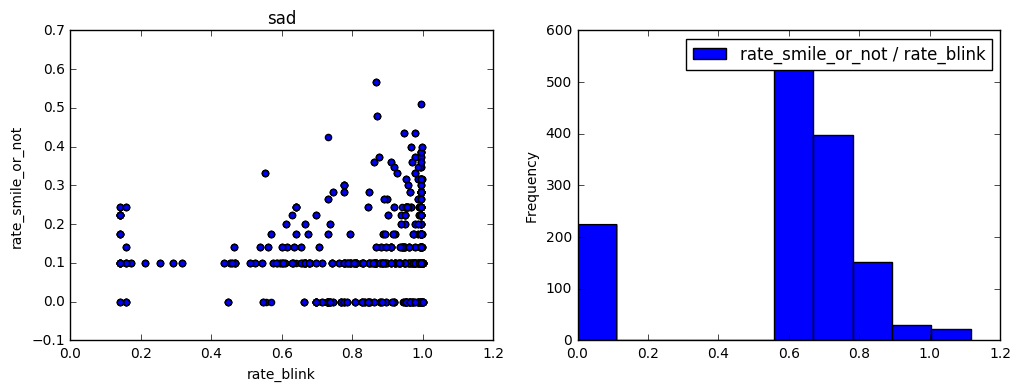

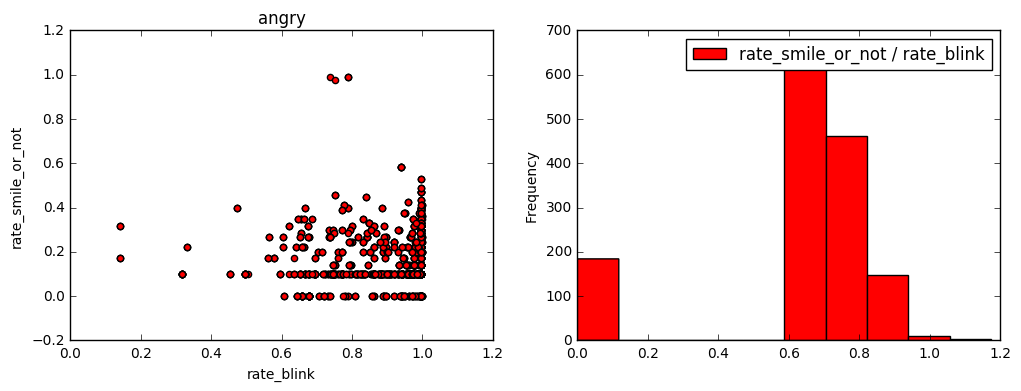

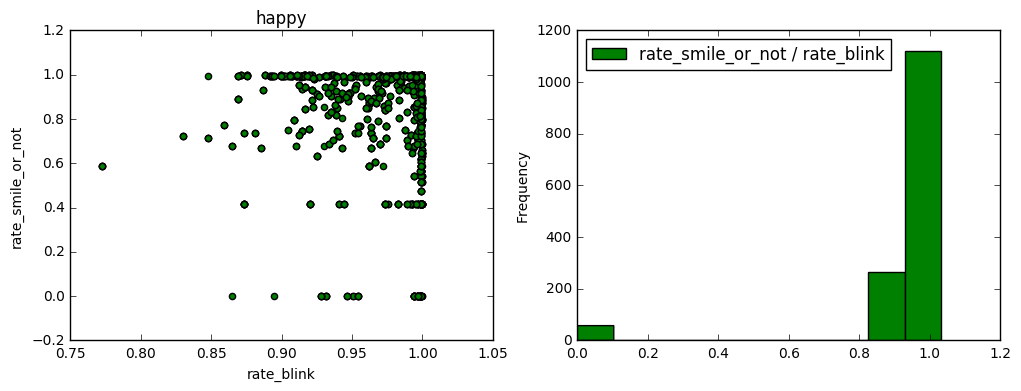

In [311]:
df_sad_norm = corr_and_normalize('sad', df_sad, norm_sad, color='b')
df_angry_norm = corr_and_normalize('angry', df_angry, norm_angry, color='r')
df_happy_norm = corr_and_normalize('happy', df_happy, norm_happy, color='g')

#### Isolation Forest algorithm

One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. The ensemble.IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

http://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest

In [307]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

def outlier_isoforest(name, X, outliers_fraction, axes):
    rng = np.random.RandomState(42)
    # fit the model
    # clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=outlier_factor)
    clf = IsolationForest(max_samples=len(X), contamination=outliers_fraction, random_state=rng)
    clf.fit(X)
    y_pred = clf.predict(X)
    
    # Min and max x and y axis
    xx_min = X.min().values[0] - 0.2
    xx_max = X.max().values[0] + 0.2
    yy_min = y_pred.min() + .5
    yy_max = y_pred.max() + .2
    
    # plot the level sets of the decision function
    xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 2), np.linspace(yy_min, yy_max, 2))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes.set_title("outliers in {} expression".format(name))
    axes.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    
    # Merge prediction outliers inside df
    X.loc[:, 'pred'] = y_pred.copy()
    
    outliers = X[X['pred'] == -1]
    X = X[X['pred']==1]
    
    # display(outliers)
    
    a = axes.scatter(X.iloc[:, 0], X.iloc[:, 1], c='white',
                    edgecolor='k', s=20)
    b = axes.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], c='red',
                    edgecolor='k', s=20)
    # plt.axis('tight')
    axes.set_xlim((xx_min, xx_max))
    axes.set_ylim((yy_min, yy_max))
    axes.set_xlabel(X.keys()[0])
    axes.set_ylabel(X.keys()[1])
    axes.legend([a, b],
               ["normal",
                "outliers"],
               loc="upper left")
    
    return outliers

#### Removing outliers

Removing and reporting the outliers detected

In [276]:
def remove_and_display_outliers(name='', df=None, outliers_fraction=0.07, outlier_function=None, color='b'):
    # outliers_fraction = 0.07
    X = df[['rate_blink', 'rate_smile_or_not']]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    outliers = outlier_function(name=name, X=X, outliers_fraction=outliers_fraction, axes=axes[0])

    # Add relation column
    df_clean = df.copy()

    # Remove outliers
    df_clean = df_clean.drop(outliers.index.values)

    # Distribution expression
    ax = df_clean.plot.scatter(x='rate_blink', y='rate_smile_or_not', s=30, color=color, edgecolor='k', ax=axes[1])
    ax.set_title('{} expression without outliers'.format(name))

    plt.show()
    
    return df_clean, outliers

#### Count and report outliers

In [282]:
# List of outliers
outliers = pd.DataFrame()

#### Sad expression

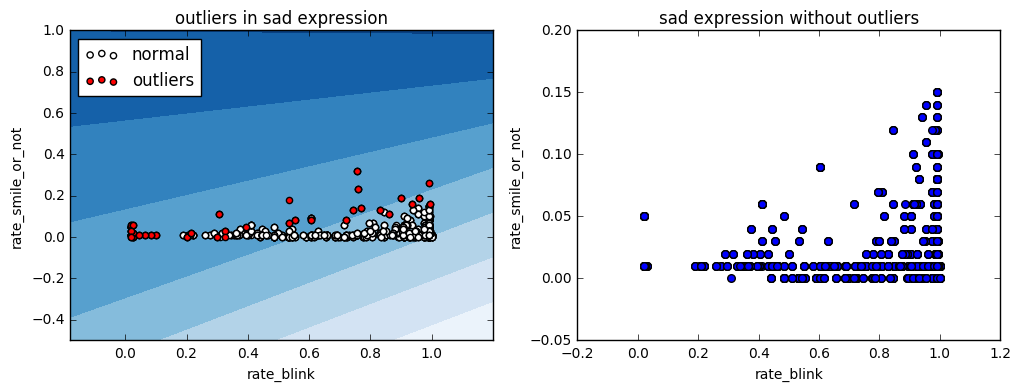

In [289]:
df_sad_clean, sad_outliers = remove_and_display_outliers(name='sad', df=df_sad, outliers_fraction=0.07, outlier_function=outlier_isoforest, color='b')
# Add outliers
outliers = outliers.append(sad_outliers, ignore_index=True)

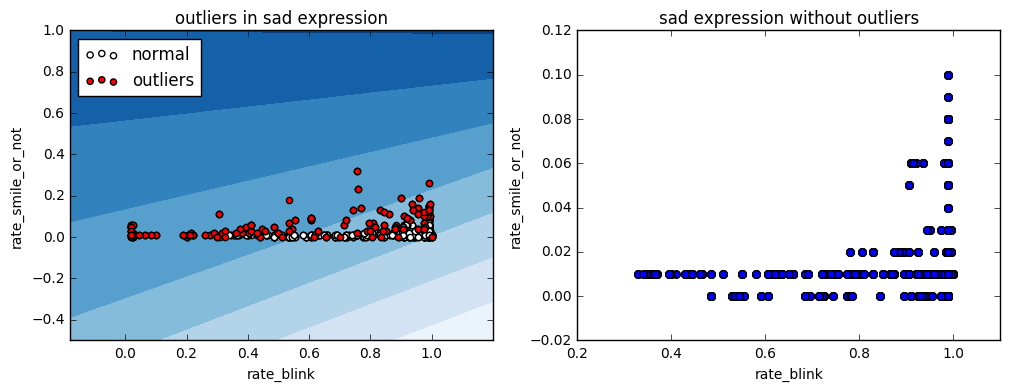

In [290]:
df_sad_final, sad_outliers = remove_and_display_outliers(name='sad', df=df_sad, outliers_fraction=0.25, outlier_function=outlier_isoforest, color='b')
# Add outliers
outliers = outliers.append(sad_outliers, ignore_index=True)

**Observations**

The last distribution had shown us a better representation of sad expression, because was removing a lot of outliers in the last right blue plot, we can see after the remove that when a user is 'sad' him/her tend to be with eyes open or a bit closed, also we could see users with mouth always closed with a variation between 0.0 and 0.10. Before this, we see a lot of outliers showing users that open the mouth a lot to express sad emotion, could be an error during the face detection extraction or users during the training really had opened the mouth trying to test the detection applications.

I consider the isolate forest with contamination fraction **0.07** and **0.25** the best metric to clean and detect outliers to sad expression, because had resulted the best distribution to represent this expression. 

#### Angry expression

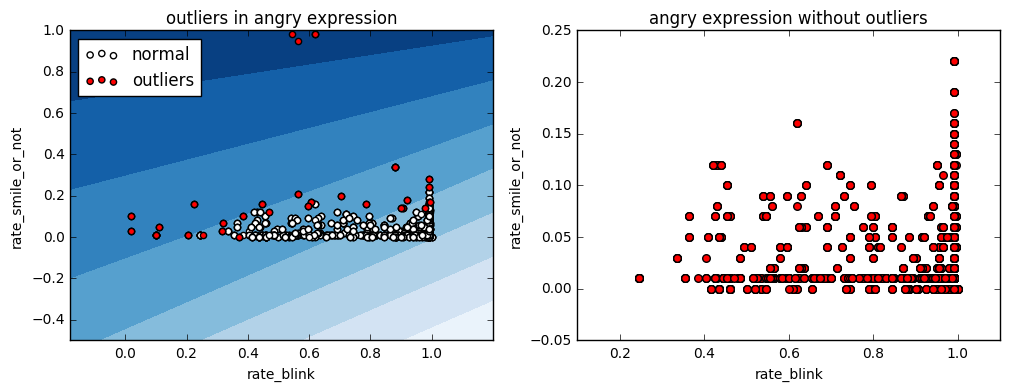

In [298]:
df_angry_clean, angry_outliers = remove_and_display_outliers(name='angry', df=df_angry, outliers_fraction=0.06, outlier_function=outlier_isoforest, color='r')
# Add outliers
outliers = outliers.append(angry_outliers, ignore_index=True)

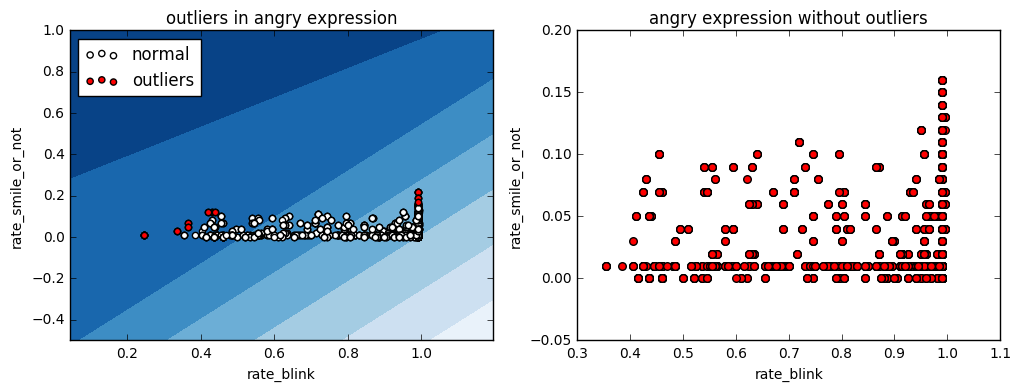

In [302]:
df_angry_final, angry_outliers = remove_and_display_outliers(name='angry', df=df_angry_clean, outliers_fraction=0.03, outlier_function=outlier_isoforest, color='r')
# Add outliers
outliers = outliers.append(angry_outliers, ignore_index=True)

**Observations**

The last distribution had shown us a better representation of angry expression, because was removing a lot of outliers in the last right red plot, we can see after the remove that when a user is 'angry' him/her tend to be with eyes open or a bit closed similar to 'sad' expression. The difference between this expression to 'sad' expression is that we had users with mouth more opening than 'sad' users, this is explained by a lot of scattered point in the sample.

I consider the isolate forest with contamination fraction **0.06** and **0.03** the best metric to clean and detect outliers to angry expression, because had resulted the best distribution to represent this expression. 

#### Happy expression

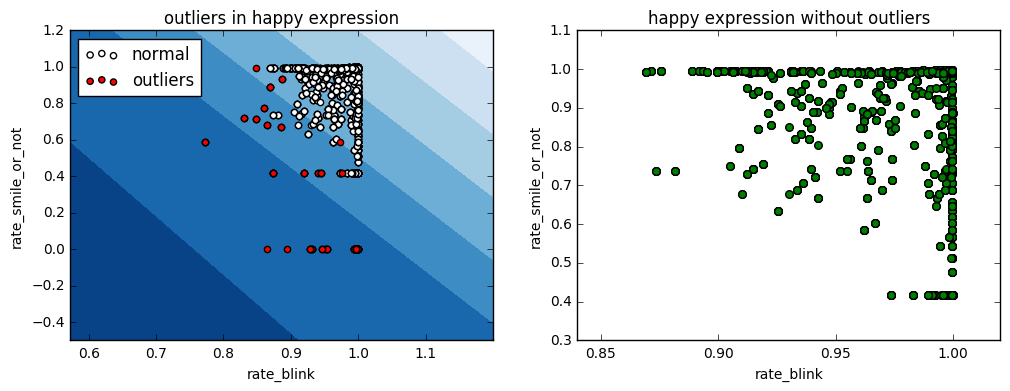

In [309]:
df_happy_final, happy_outliers = remove_and_display_outliers(name='happy', df=df_happy_norm, outliers_fraction=0.07, outlier_function=outlier_isoforest, color='g')
# Add outliers
outliers = outliers.append(happy_outliers, ignore_index=True)

**Observations**

The last distribution had shown us a better representation of happy expression, because it was removing a lot of outliers in the last right green plot, we can see after the remove that when a user is 'happy' him / her tend to be with eyes totally open and smiling all the time considered that his / her smiling variation had between 0.85 and 1.0, as well as his / her mouth that continues to open the biggest part of time.

I consider the isolate forest with contamination fraction **0.07** the best metric to clean and detect outliers to happy expression, because had resulted the best distribution to represent this expression. 

### Final data without outliers

In [330]:
df_final = df.drop(outliers.index.values)

X = df_final[['rate_blink_left', 'rate_blink_right', 'rate_smile_or_not']]
Y = df_final['feel']

#### Save dataframe

In [369]:
# df_final.to_csv('training_wo_outliers.csv')

### Investigate the final data preprocessed

Investigate how many outliers was returned and how many this represent in relation the all expression 

In [334]:
n_outliers = len(outliers)

print("Outliers: {} ({:.2f}%)".format(n_outliers, (100.0 * n_outliers / n_expressions)))
print("Expressions: {}".format(len(df_final)))

Outliers: 1557 (36.52%)
Expressions: 2707


## 3. Developing a model

In this second section of the project, we will develop the model to make a prediction, making accurate evaluations of each model's performance.

### Shuffle and split data

We will to implement the following:

- Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
    - Split the data into 90% training and 10% testing.
    - Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [336]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement

#### Algorithm OneVsRestClassifier

In [337]:
def model_1(resultados):
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import LinearSVC
    modelo = OneVsRestClassifier(LinearSVC(random_state = 0))
    resultado = accuracy_score("OneVsRest", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm OneVsOne

In [338]:
def model_2(resultados):
    from sklearn.multiclass import OneVsOneClassifier
    from sklearn.svm import LinearSVC
    modelo = OneVsOneClassifier(LinearSVC(random_state = 0))
    resultado = accuracy_score("OneVsOne", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm MultinomialNB

In [339]:
def model_3(resultados):
    from sklearn.naive_bayes import MultinomialNB
    modelo = MultinomialNB()
    resultado = accuracy_score("MultinomialNB", modelo, X_train, y_train)

    resultados[resultado] = modelo 

#### Algorithm AdaBoostClassifier

In [340]:
def model_4(resultados):
    from sklearn.ensemble import AdaBoostClassifier
    modelo = AdaBoostClassifier()
    resultado = accuracy_score("AdaBoostClassifier", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm LinearSVC

In [341]:
def model_5(resultados):
    from sklearn.svm import LinearSVC
    modelo = LinearSVC(random_state=0)
    resultado = accuracy_score('LinearSVC', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm SVC with Kernel Linear

In [342]:
def model_6(resultados):
    from sklearn.svm import SVC
    modelo = SVC(kernel='linear', C=0.025)
    resultado = accuracy_score('SVC with Kernel Linear', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm DecisionTreeClassifier

In [343]:
def model_7(resultados):
    from sklearn.tree import DecisionTreeClassifier
    modelo = DecisionTreeClassifier(random_state=0)
    resultado = accuracy_score('DecisionTreeClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorith Extra Trees

In [344]:
def model_8(resultados):
    from sklearn.ensemble import ExtraTreesRegressor
    modelo = ExtraTreesRegressor(n_estimators=10, random_state=0)
    resultado = accuracy_score('ExtraTrees', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm GaussianProcessClassifier

In [345]:
def model_9(resultados):
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    modelo = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
    resultado = accuracy_score('GaussianProcessClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm MLPClassifier

In [346]:
def model_10(resultados):
    from sklearn.neural_network import MLPClassifier
    modelo = MLPClassifier(alpha=1)
    resultado = accuracy_score('MLPClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm KNeighborsClassifier

In [347]:
def model_11(resultados):
    from sklearn.neighbors import KNeighborsClassifier
    modelo = KNeighborsClassifier(6)
    resultado = accuracy_score('KNeighborsClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm QuadraticDiscriminantAnalysis

In [348]:
def model_12(resultados):
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    modelo = QuadraticDiscriminantAnalysis()
    resultado = accuracy_score('QuadraticDiscriminantAnalysis', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm GaussianNB

In [349]:
def model_13(resultados):
    from sklearn.naive_bayes import GaussianNB
    modelo = GaussianNB()
    resultado = accuracy_score('GaussianNB', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm RBF SVM

In [350]:
def model_14(resultados):
    from sklearn.svm import SVC
    modelo = SVC(gamma=2, C=1)
    resultado = accuracy_score('RBF SVM', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Selecting the best algorithm

In [365]:
# Storage result of all algorithm and select the best
resultados = {}

# Create model 1
model_1(resultados)
# Create model 2
model_2(resultados)
# Create model 3
model_3(resultados)
# Create model 4
model_4(resultados)
# Create model 5
model_5(resultados)
# Create model 6
model_6(resultados)
# Create model 7
model_7(resultados)
# Create model 8
model_8(resultados)
# Create model 9
# model_9(resultados)
# Create model 10
model_10(resultados)
# Create model 11
model_11(resultados)
# Create model 12
model_12(resultados)
# Create model 13
model_13(resultados)
# Create model 14
model_14(resultados)


vencedor = performance_metric(resultados, X_train, X_test, y_train, y_test);

Taxa de acerto do OneVsRest: 62.28%
Taxa de acerto do OneVsOne: 62.07%
Taxa de acerto do MultinomialNB: 61.66%
Taxa de acerto do AdaBoostClassifier: 67.66%
Taxa de acerto do LinearSVC: 62.28%
Taxa de acerto do SVC with Kernel Linear: 57.68%
Taxa de acerto do DecisionTreeClassifier: 87.61%
Taxa de acerto do ExtraTrees: 81.35%
Taxa de acerto do MLPClassifier: 63.59%
Taxa de acerto do KNeighborsClassifier: 72.99%
Taxa de acerto do QuadraticDiscriminantAnalysis: 64.33%
Taxa de acerto do GaussianNB: 61.74%
Taxa de acerto do RBF SVM: 65.15%
Taxa de acerto base: 36.53%

Vencedor:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Taxa de acerto do algoritmo vencedor entre os algoritmos no mundo real :

### Data without preprocessing 

The best algorithm based on their hit:

| Algoritmo  | Taxa de acerto (%) |
|:-:|:-:|
| DecisionTreeClassifier  | 84.54% |
| ExtraTrees  | 74.71% |
| KNeighborsClassifier  | 72.21% |
| AdaBoostClassifier  | 63.28% |
| RBF SVM  | 62.60% |
| OneVsOne  | 61.30% |
| Linear SVC  | 60.96% |
| OneVsRest  | 60.96% |
| QuadraticDiscriminantAnalysis  | 59.81% |
| GaussianNB  | 59.47% |
| MLPClassifier  | 59.34% |
| MultinomialNB  | 57.21% |
| SVC with Kernel Linear  | 53.66% |
| Algoritmo base  | 36.77% |

### Data with preprocessing 

The best algorithm based on their hit:

| Algoritmo  | Taxa de acerto (%) |
|:-:|:-:|
| DecisionTreeClassifier  | 87.61% |
| ExtraTrees  | 81.35% |
| KNeighborsClassifier  | 72.99% |
| AdaBoostClassifier  | 67.66% |
| RBF SVM  | 65.15% |
| QuadraticDiscriminantAnalysis  | 64.33% |
| MLPClassifier  | 63.92% |
| Linear SVC  | 62.28% |
| OneVsRest  | 62.28% |
| OneVsOne  | 62.07% |
| GaussianNB  | 61.74% |
| MultinomialNB  | 61.66% |
| SVC with Kernel Linear  | 57.68% |
| Algoritmo base  | 36.53% |

#### Data without preprocessing

The winner algorithm with higher acceptance rates for DecisionTreeClassifier, with rate of **84.54%**.

In the real world the algorithm obtained a rate of **83.61%**, close to the support rate during the training. Using the 10% separated during cross-validation.

Other algorithms had had higher result like ExtraTrees, KNeighborsClassifier and AdaBoostClassifier, all them can be analyzed with differents views and could become a good candidate.

#### Data with preprocessing

The winner algorithm with higher acceptance rates continue for DecisionTreeClassifier, but now with rate of **87.61%**.

In the real world the algorithm obtained a rate of **91.14%**, close to the support rate during the training but now almost 10 percentuais point more than previously test without preprocessing. Using the 10% separated during cross-validation.

Other algorithms had had higher result like ExtraTrees, KNeighborsClassifier and AdaBoostClassifier, all them can be analyzed with differents views and could become a good candidate. All also continue to better with data processing and with highest rates than previously tests too.

#### Conclusion

With data preprocessing removing the outliers we could see a good perfomance and improvement in all algorithms this explain the importance to preprocessing and optimize the data removing noise data that can disturb your final result.

## 4. Analysis

In this section, we will analisy the prediction and plot the data and see boundary of prediction.

### Plot decision surface function

We have 3 **features**:
- rate_blink_left
- rate_blink_right
- rate_smile_or_not

The **target** is feelings:
- Sad
- Angry
- Happy

In [352]:
def plot_surface(name, clf, features):
    # Parameters
    plot_colors = "bry"
    plot_step = 0.02
    classifier = ['sad', 'angry', 'happy']
    # feature_names = ['rate_blink_left', 'rate_smile_or_not']

    # Plot the decision boundary
    fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

    for index, feature_name in zip(range(len(features)), features):
        # Train
        clf = clf.fit(X[feature_name], Y)
        
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # print clf

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = eixos[index].contourf(xx, yy, Z, cmap=plt.cm.Paired)

        eixos[index].set_xlabel(feature_name[0])
        eixos[index].set_ylabel(feature_name[1])

        # Plot the training points
        for i, color in zip(range(len(classifier)), plot_colors):
            idx = np.where(Y == i)
            eixos[index].scatter(X.iloc[idx[0], 0], X.iloc[idx[0], 1], c=color, label=classifier[i],
                        cmap=plt.cm.Paired)

    plt.suptitle("Decision surface from {}".format(name))
    plt.legend()
    plt.show()

### Analysing decision surface 

Based on the result, let us analyze the four best algorithms.

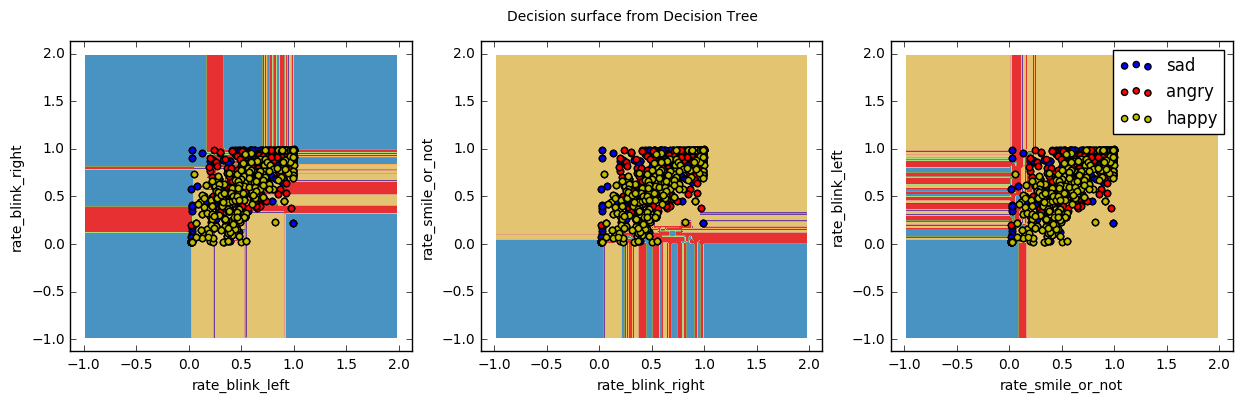

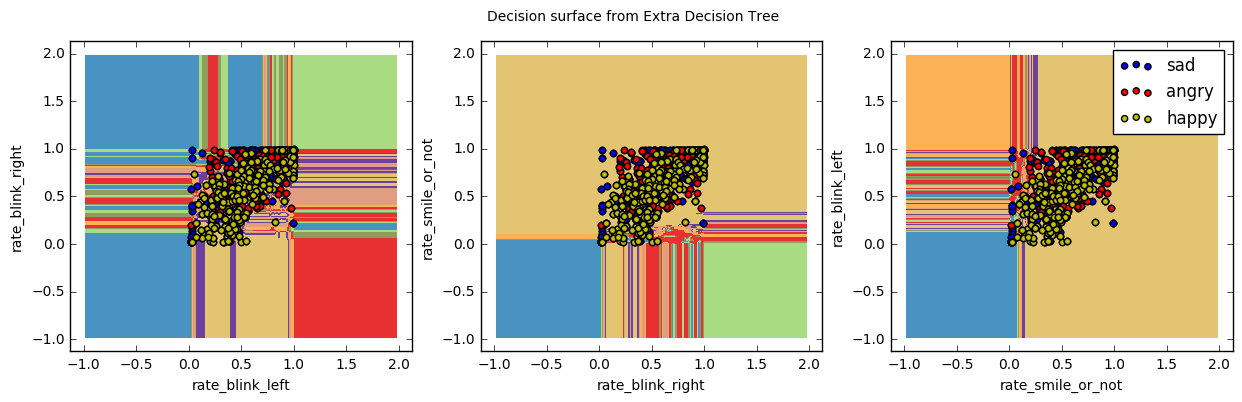

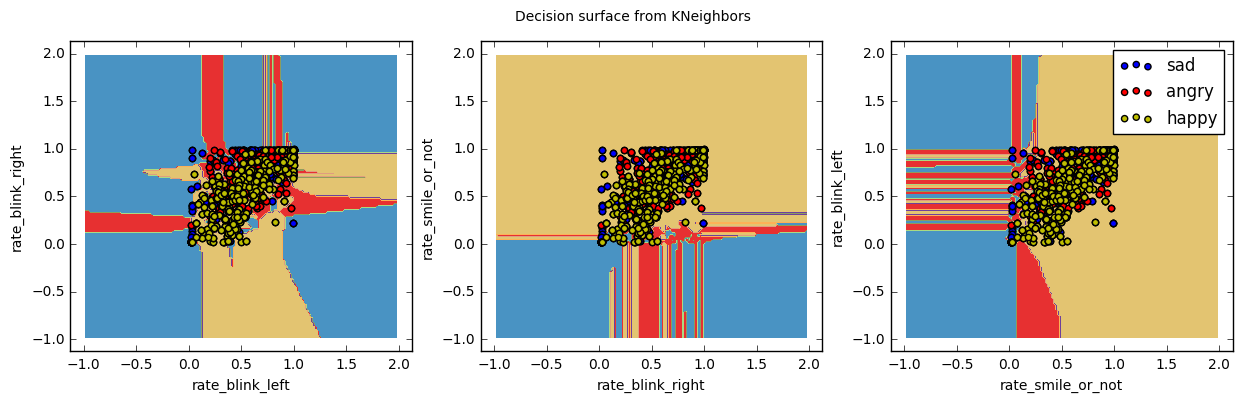

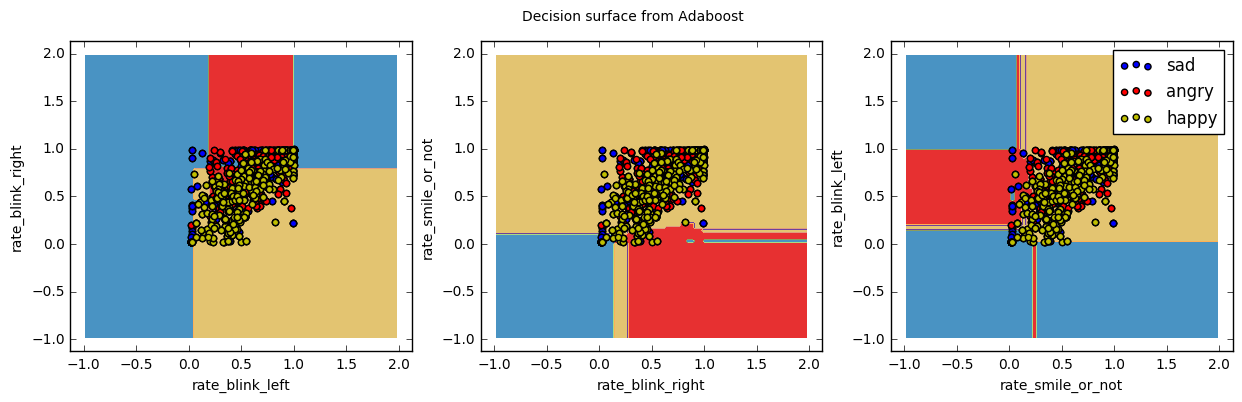

In [353]:
# Decision Tree
plot_surface(name='Decision Tree', clf=vencedor, features=[['rate_blink_left', 'rate_blink_right'], ['rate_blink_right', 'rate_smile_or_not'], ['rate_smile_or_not', 'rate_blink_left']])

# Extra Decision Tree
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor(n_estimators=10, random_state=0)
plot_surface(name='Extra Decision Tree', clf=clf, features=[['rate_blink_left', 'rate_blink_right'], ['rate_blink_right', 'rate_smile_or_not'], ['rate_smile_or_not', 'rate_blink_left']])

# KNeighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3)
plot_surface(name='KNeighbors', clf=clf, features=[['rate_blink_left', 'rate_blink_right'], ['rate_blink_right', 'rate_smile_or_not'], ['rate_smile_or_not', 'rate_blink_left']])

# Adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
plot_surface(name='Adaboost', clf=clf, features=[['rate_blink_left', 'rate_blink_right'], ['rate_blink_right', 'rate_smile_or_not'], ['rate_smile_or_not', 'rate_blink_left']])

**Observations**

Data without preprocessing

Although the **Decision Tree** had been the best algorithm it hadn't had a good generalization. On the other hand, in my opinion the **KNeighborhood** reached a better generalization.

Data with preprocessing

Now sees me that the **Decision Tree** had reached the better generalization in relation to all algorithms.

### Learning Cuve

http://scikit-learn.org/stable/modules/learning_curve.html

<module 'matplotlib.pyplot' from 'c:\python27\lib\site-packages\matplotlib\pyplot.pyc'>

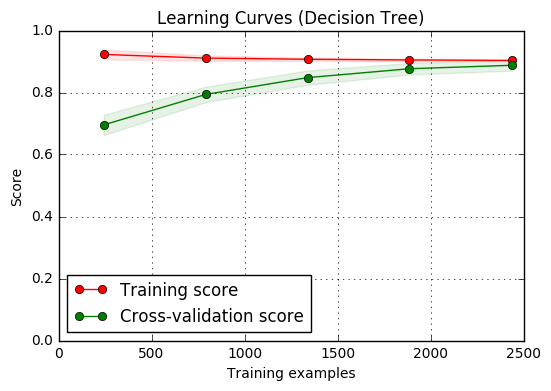

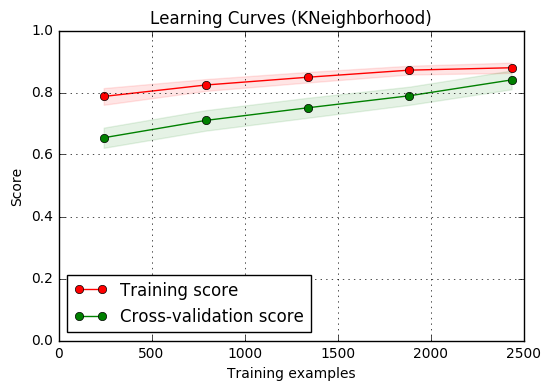

In [354]:
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

estimator = vencedor
plot_learning_curve(estimator, title, X, Y, ylim=(0, 1.0), cv=cv, n_jobs=4)

title = "Learning Curves (KNeighborhood)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

estimator = KNeighborsClassifier(3)
plot_learning_curve(estimator, title, X, Y, ylim=(0, 1.0), cv=cv, n_jobs=4)

### Optimal Model

Finding the optimal model with GridSearchCV

In [366]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Create the parameters list you wish to tune
# Decision Tree
parameters = { 
              'criterion' : ('entropy', 'gini'),
              'class_weight' : ('balanced', None),
              'min_samples_split' : range(2, 10),
              # 'max_features' : range(1, n_features),
              # 'max_depth' : range(1, 4),
              'random_state' : range(0, 10),
              'presort' : (False, True)
            }

# Initialize the classifier
clf = vencedor

# Make an f1 scoring function using 'make_scorer' 
scorer = make_scorer(f1_score, average='macro')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scorer, cv=10)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

print clf

# Report the final parameters from the optimal model
accuracy_score('vencedor otimizado', clf, X_train, y_train)
real_world(clf, X_train, X_test, y_train, y_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')
Taxa de acerto do vencedor otimizado: 87.81%

Taxa de acerto do algoritmo vencedor entre os algoritmos no mundo real : 90.77% 


**Data without preprocessing**

In relation to the previous result, it obtained a small increase of **0.06%** percentual points. It show us that the algorithm already finds itself in the best performance even trying to optimize the algorithm with GridSearchCV.

| | Before | After |
|--|--|--|
|Training| 84.54% | 84.60% |
|Cross-validation | 83.61% | 83.61% |

**Data preprocessing**

In relation to the previous result, it obtained a small increase of **0.2%** percentual points in training. It shows us that the algorithm can improve if we use the GridSearchCV without outliers in the data. In cross-validation the algorithm decreased around 1% percentual point but continue with a hight rate aroud 90%.

| | Before | After |
|--|--|--|
|Training| 87.61% | 87.81% |
|Cross-validation | 91.14% | 90.77% |

### Confusion Matrix

Building confusion matrix from classifier and evalueate the predict

Score médio: 0.91


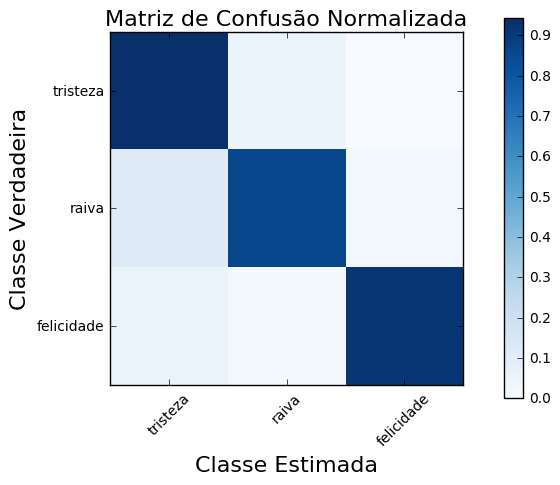

In [367]:
from confusion_matrix import evaluate
from data import get_evaluate

#X_train, y_train, X_test, y_test = get_evaluate()
#print len(X_train), len(y_train), len(X_test), len(y_test)

vencedor = clf

evaluate(X_train, y_train, X_test, y_test, vencedor, ['tristeza', 'raiva', 'felicidade'])

**Data without preprocessing**

Average score of **84%** with highlight to the feeling of **happiness**, with little indecision between the feelings. But the feelings of sadness and anger still show an indecision between the two feelings

**Data with preprocessing**

Now the average score increase of **91%** continues the highlight to **happiness** and had **less the indecision between to sadness and anger expression**. This show us the importance to preprocessing and all algorithm can improve too. Now we have big rates than previously and had less predict error.

## 5. Making Predictions

Feelings are:

- Sad (0)
- Surprise (1)
- Happy (2)

In [368]:
from collections import Counter

# The best model choiced
modelo = vencedor

features, target, df = get_predict('../server/')
modelo.fit(X, Y)
#display(features)
predict = modelo.predict(features)
result = Counter(predict)
predicted = result.most_common()[0][0]
print result

switcher = {
        0: "Vc parece estar triste! :(",
        1: "Vc parece estar com raiva! :o",
        2: "Vc parece estar feliz! :)"
}
msg = switcher.get(predicted, "Normal")
    
print msg

Counter({1: 108, 0: 61, 2: 32})
Vc parece estar com raiva! :o
